In [37]:
# read data and take a cursory look
df=pd.read_csv('https://raw.githubusercontent.com/cdds-uiuc/simles-book/main/content/Module02/data/PortArthur_precip.csv')
#df=pd.read_csv('https://raw.githubusercontent.com/cdds-uiuc/simles-book/main/content/Module02/data/Beaumont_precip.csv')
df.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP
0,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-01,NaN,NaN,0.0
1,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-02,NaN,NaN,0.0
2,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-03,NaN,NaN,0.0
3,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-04,NaN,NaN,0.0
4,USW00012917,"PORT ARTHUR SE TX REGIONAL AIRPORT, TX US",1947-10-05,NaN,NaN,0.0


In [38]:
df.DATE = pd.to_datetime(df.DATE, format='%Y-%m-%d')


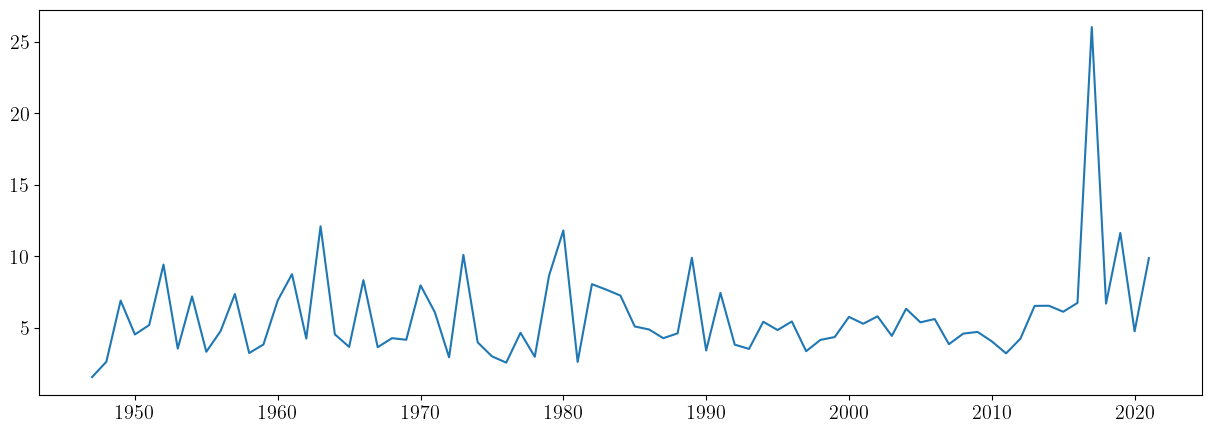

In [39]:
# Block Maxima
dfM=df.groupby(df.DATE.dt.year).max()
plt.plot(dfM.PRCP)
max_rain=dfM.PRCP.values


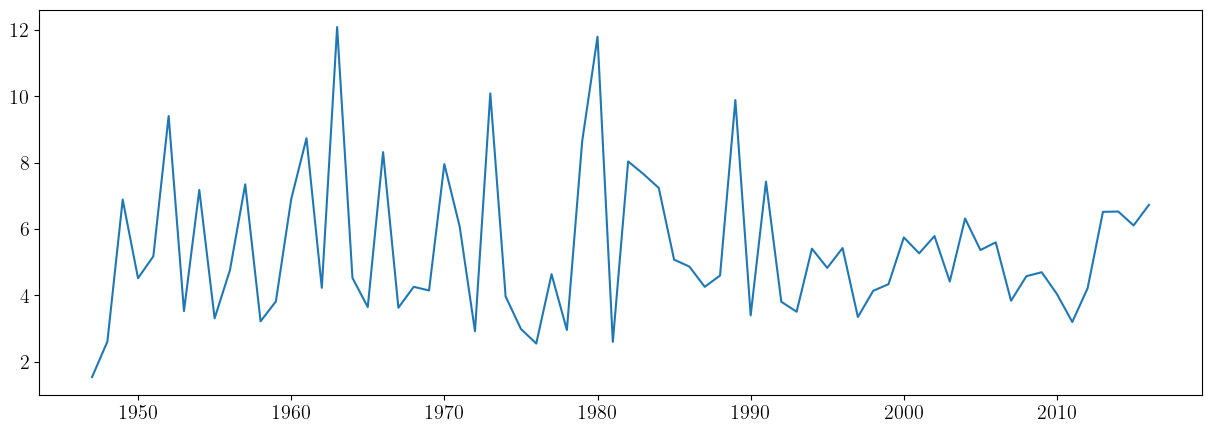

In [41]:
dfM=df.groupby(df.DATE.dt.year).max()

dfM=dfM[dfM.DATE.dt.year<2017]
max_rain=dfM.PRCP.values
plt.plot(dfM.PRCP)
max_rain=dfM.PRCP.values


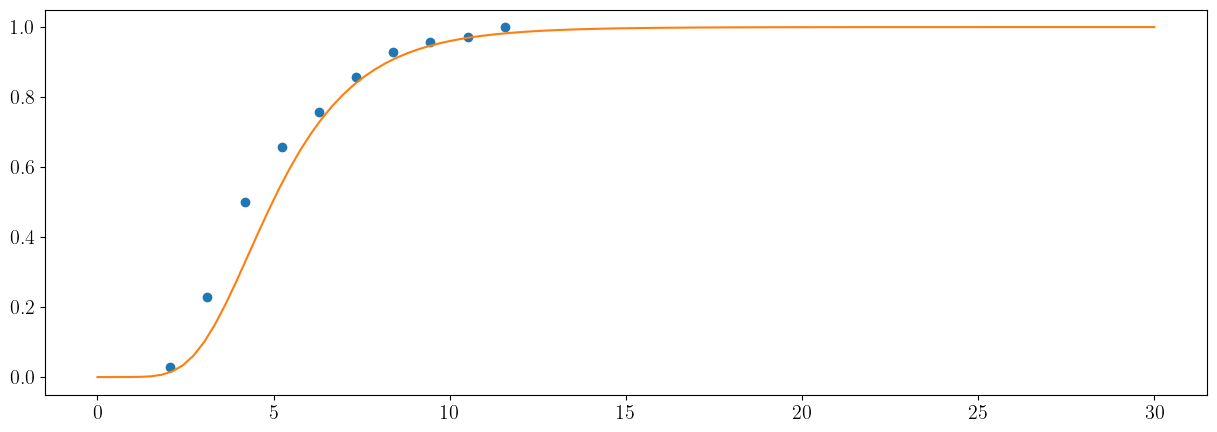

In [42]:
x=np.linspace(0,30,100)
c,loc,scale=stats.genextreme.fit(max_rain)
cdf=stats.genextreme.cdf(x,c,loc=loc,scale=scale)

H=np.histogram(max_rain,density='true')
CDF=np.cumsum(H[0])
CDF=CDF/np.max(CDF)
bins=(H[1][0:-1]+H[1][1:])/2
plt.plot(bins,CDF/np.max(CDF),'o')
plt.plot(x,cdf)


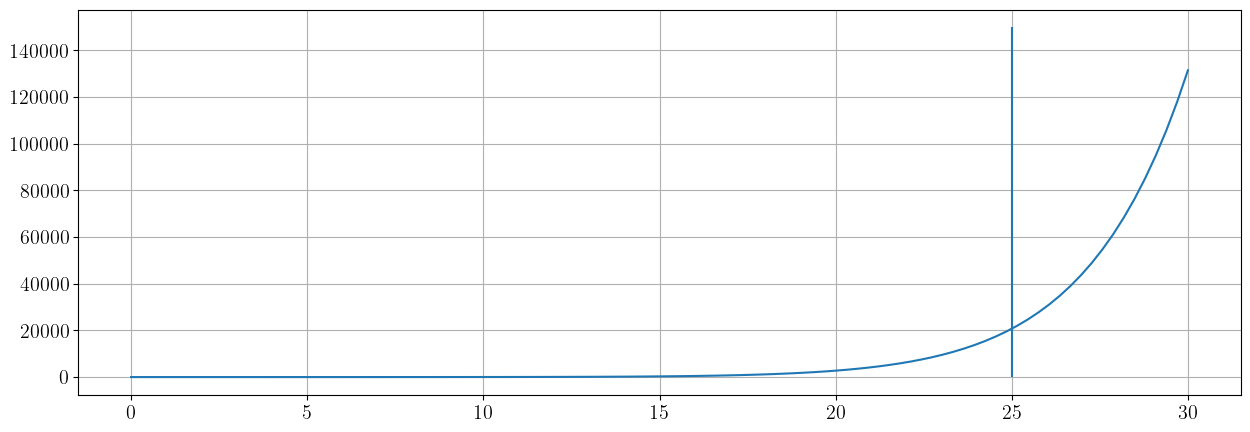

In [50]:
plt.plot(x,1./(1-cdf))
plt.xlabel=('Precipitation Amount')
plt.ylabel=('Return Time [years]')

plt.vlines(25,0,150000)
plt.grid()
#plt.plot(bins,1./(1-CDF),'o')

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/cdds-uiuc/simles-book/main/content/Module02/data/Beaumont_precip.csv')


# Extra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
# These are some parameters to make figures nice (and big)

plt.rcParams['figure.figsize'] = 16,8
plt.rcParams['text.usetex'] = True
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [405]:
#convert from m/hr to inches/hr, taking into account we only sample 4hrs of the day 
from urllib.request import urlretrieve


url='https://github.com/cdds-uiuc/simles-book/raw/5faf634/content/Module01/data/ERA5precip_urbana_1950-2021.nc'
fname='./data/ERA5precip_urbana_1950-2021.nc'
urlretrieve(url, fname);
import xarray as xr
#convert from m/hr to inches/hr, taking into account we only sample 4hrs of the day 
from urllib.request import urlretrieve


file='./data/ERA5precip_urbana_1950-2021.nc'
ds=xr.open_dataset(file);

unit_conv=1000/24.5*6

pr_hr =ds.tp*unit_conv;
pr_day =pr_hr.resample(time='1D').sum('time')
pr_mon=pr_hr.resample(time='1M').sum('time')
pr_yr =pr_hr.resample(time='1Y').max('time')

72

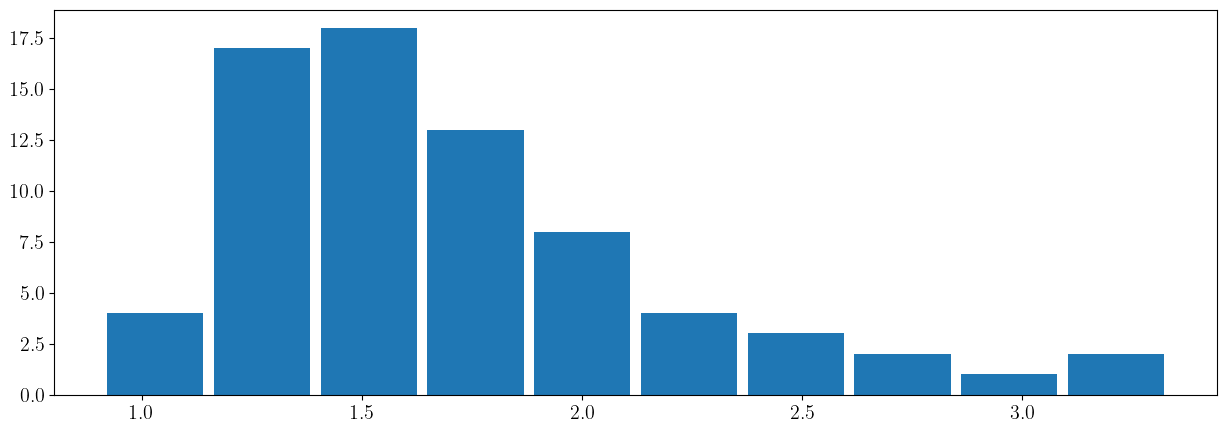

In [410]:
pr_yr =pr_hr.resample(time='1Y').max('time')
plt.hist(pr_yr,10,rwidth=0.9);
len(pr_yr)

/var/folders/pr/3_264g5j1d15jdsjfgsqbdj80000gp/T/ipykernel_33289/1192276657.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(bins,1./(1-CDF),'o')


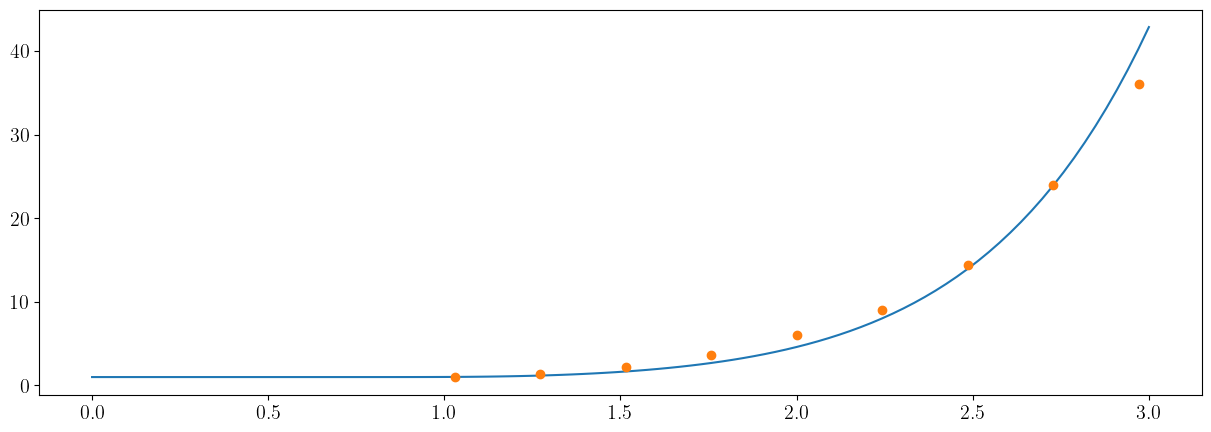

In [440]:
x=np.linspace(0,3,100)
c,loc,scale=stats.genextreme.fit(pr_yr)
cdf=stats.genextreme.cdf(x,c,loc=loc,scale=scale)

H=np.histogram(pr_yr,density='true')
CDF=np.cumsum(H[0])
CDF=CDF/np.max(CDF)
bins=(H[1][0:-1]+H[1][1:])/2
#plt.plot(bins,CDF/np.max(CDF),'o')

plt.plot(x,1./(1-cdf))
plt.plot(bins,1./(1-CDF),'o')